In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import datetime

In [2]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'

In [3]:
df=pd.read_csv(url)

In [4]:
df.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0


In [5]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
df['SizeRank'].unique()

array([    0,     1,     2, ..., 28413, 28415, 28439], dtype=int64)

In [7]:
#larger city=lower rank.
largest_city_ranks = [0, 1, 2, 3]
large_city = df[df['SizeRank'].isin(largest_city_ranks)]

In [8]:
id_variables=['RegionID','SizeRank','RegionName','RegionType',
              'StateName','State','Metro','CountyName']
melted=pd.melt(large_city,id_vars=id_variables, var_name='Date',
               value_name='HomeValue')
melted['Date']=pd.to_datetime(melted['Date'])
melted.set_index('Date', inplace=True)
monthly = melted.groupby([pd.Grouper(freq='M'), 'SizeRank']).mean(numeric_only=True).reset_index()

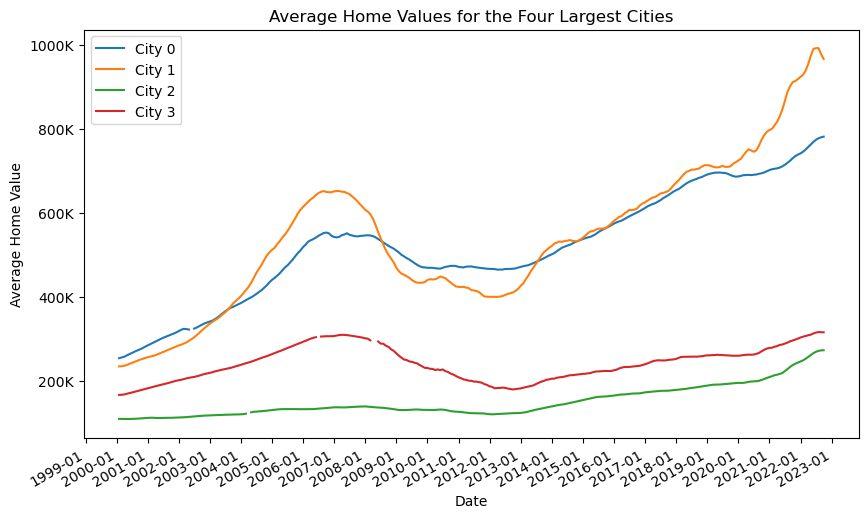

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
for size_rank in largest_city_ranks:
    city_data = monthly[monthly['SizeRank'] == size_rank]
    ax.plot(city_data['Date'], city_data['HomeValue'], label=f'City {size_rank}')
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Value')
ax.set_title('Average Home Values for the Four Largest Cities')
ax.legend()
def format_ticks(value, tick_number):
    return f'{value/1000:.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())
fig.autofmt_xdate()
plt.show()

In [10]:
monthly.head(10)

,Date,SizeRank,RegionID,HomeValue
0,2000-01-31,0,6181.0,253690.0
1,2000-01-31,1,12447.0,234181.0
2,2000-01-31,2,39051.0,109068.0
3,2000-01-31,3,17426.0,166139.0
4,2000-02-29,0,6181.0,255517.0
5,2000-02-29,1,12447.0,234401.0
6,2000-02-29,2,39051.0,109079.0
7,2000-02-29,3,17426.0,166536.0
8,2000-03-31,0,6181.0,257207.0
9,2000-03-31,1,12447.0,235513.0


In [11]:
target_date = datetime.datetime(2008, 12, 31)
nov_2008 = monthly[monthly['Date'] == pd.to_datetime('2008-11-30')]
dec_2008 = monthly[monthly['Date'] == pd.to_datetime('2008-12-31')]
change_in_home_values = dec_2008['HomeValue'].values - nov_2008['HomeValue'].values
sorted_cities_dec_2008 = large_city.sort_values(by='2008-12-31', ascending=False)
highest = sorted_cities_dec_2008.iloc[0]['RegionName']
lowest = sorted_cities_dec_2008.iloc[-1]['RegionName']

# Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [12]:
print("City with the highest typical home value at the end of 2008:",highest)
print("City with the least typical home value at the end of 2008:",lowest)
for index, row in sorted_cities_dec_2008.iterrows():
    print(f"City {row['SizeRank']}: {row['RegionName']} - ${row['2008-12-31']:.2f}")

City with the highest typical home value at the end of 2008: New York
City with the least typical home value at the end of 2008: Houston
City 0: New York - $510309.00
City 1: Los Angeles - $469294.00
City 3: Chicago - $265306.00
City 2: Houston - $131283.00


# How much did the home values change from November 2008 to December 2008 (in dollars)?

In [13]:
for i, size_rank in enumerate(largest_city_ranks):
    city_name = large_city[large_city['SizeRank'] == size_rank]['RegionName'].values[0]
    change = change_in_home_values[i]
    print(f"City {size_rank}: {city_name} - ${change:.2f}")

City 0: New York - $-4458.00
City 1: Los Angeles - $-12611.00
City 2: Houston - $-964.00
City 3: Chicago - $-5753.00
